# Chapter 1 - The Machine Learning landscape
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alirezatheh/handson-ml3-notes/blob/main/notebooks/01_the_machine_learning_landscape.ipynb)
[![Open in Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/alirezatheh/handson-ml3-notes/blob/main/notebooks/01_the_machine_learning_landscape.ipynb)

Machine learning has been around for decades in some specialized applications, such as optical character recognition (OCR). The first machine learning application that really became mainstream in the 1990s was the *spam filter*.

## What is Machine Learning
Machine learning is the science (and art) of programming computers so they can *learn from data*.

A more general definition:

    [Machine learning is the] field of study that gives computers the ability to learn without being explicitly programmed.
    —Arthur Samuel, 1959
    
a more engineering-oriented one:

    A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E.
    —Tom Mitchell, 1997

## Why Use Machine Learning
To summarize, machine learning is great for:
- Problems for which existing solutions require a lot of fine-tuning or long lists of rules, e.g. spam filter
- Complex problems for which using a traditional approach yields no good solution, e.g. speech recognition
- Fluctuating environments (a machine learning system can easily be retrained on new data, always keeping it up to date), e.g. when spammers notice
- Getting insights about complex problems and large amounts of data

## Examples of Applications
- *Analyzing images of products on a production line to automatically classify them*
- *Detecting tumors in brain scans*
- *Automatically classifying news articles*
- *Automatically flagging offensive comments on discussion forums*
- *Summarizing long documents automatically*
- *Creating a chatbot or a personal assistant*
- *Forecasting our company’s revenue next year, based on many performance metrics*
- *Making our app react to voice commands*
- *Detecting credit card fraud*
- *Segmenting clients based on their purchases so that we can design a different marketing strategy for each segment*
- *Representing a complex, high-dimensional dataset in a clear and insightful diagram*
- *Recommending a product that a client may be interested in, based on past purchases*
- *Building an intelligent bot for a game*

## Types of Machine Learning Systems
It is useful to classify ML systems based on the following criteria:
- How they are supervised during training
- Whether or not they can learn incrementally on the fly
- Whether they work by comparing new data points to known data points, or instead by detecting patterns in the training data and building a predictive model

### Training Supervision
#### Supervised learning
The training set we feed to the algorithm includes the desired solutions, called *labels*. e.g. classification and regression.

#### Unsupervised learning
The training data is unlabeled. e.g. clustering and association rule learning, in which the goal is to dig into large amounts of data and discover interesting relations between attributes.

#### Semi-supervised learning
Since labeling data is usually time-consuming and costly, we will often have partially labeled data, which some algorithms can deal with. Most semi-supervised learning algorithms are combinations of unsupervised and supervised algorithms.

#### Self-supervised learning
Another approach is generating a fully labeled dataset from a fully unlabeled one. e.g. randomly mask an small part of each image and train a model to recover original images.

#### Reinforcement learning
The learning system, called an *agent* in this context, can observe the environment, select and perform actions, and get *rewards* in return (or *penalties* in the form of negative rewards). It must then learn by itself what is the best strategy, called a *policy*, to get the most reward over time. A policy defines what action the agent should choose when it is in a given situation.

### Batch Versus Online Learning
#### Batch learning
The system is incapable of learning incrementally: it must be trained using all the available data. It is typically done offline and called *offline learning*. Unfortunately, a model’s performance tends to decay slowly over time, because the world continues to evolve while the model remains unchanged. This phenomenon is often called *model rot* or *data drift*.

#### Online learning
We train the system incrementally by feeding it data instances sequentially, either individually or in small groups called *mini-batches*. Online learning algorithms can be used to train models on huge datasets that cannot fit in one machine’s main memory (this is called *out-of-core learning*). Out-of-core learning is usually done offline, so *online learning* can be a confusing name. Think of it as incremental learning.

### Instance-Based Versus Model-Based Learning
One more way to categorize machine learning systems is by how they *generalize*. There are two main approaches to generalization:

#### Instance-based learning
The system learns the examples by heart, then generalizes to new cases by using a *similarity measure* to compare them to the learned examples (or a subset of them).

#### Model-based learning and a typical machine learning workflow
Another way to generalize from a set of examples is to build a model of these examples and then use that model to make *predictions*.

e.g. suppose we want to know if money makes people happy, so we download the Better Life Index data from the [OECD's website](http://stats.oecd.org/index.aspx?DataSetCode=BLI) (to get the Life Satisfaction for each country) and World Bank stats about gross domestic product (GDP) per capita from [OurWorldInData.org](https://ourworldindata.org/grapher/gdp-per-capita-worldbank). Then we join the tables and sort by GDP per capita:

| Country       | GDP per capita \(USD\) | Life satisfaction |
|:--------------|:-----------------------|:------------------|
| Turkey        | 28384.987785           | 5.5               |
| Hungary       | 31007.768407           | 5.6               |
| France        | 42025.617373           | 6.5               |
| New Zealand   | 42404.393738           | 7.3               |
| Australia     | 48697.837028           | 7.3               |
| Denmark       | 55938.212809           | 7.6               |
| United States | 60235.728492           | 6.9               |

Let’s plot the data for these countries:

<center>
  <img 
    src="../images/01/money_happy.png" 
    onerror="
      this.onerror = null;
      const repo = 'https://github.com/alirezatheh/handson-ml3-notes/blob/main';
      this.src = repo + this.src.split('..')[1];
    "
  >
</center>

Although the data is noisy, it looks like life satisfaction goes up more or less linearly as the country’s GDP per capita increases. So we decide to model life satisfaction as a linear function of GDP per capita. This step is called *model selection*.

**Equation 1-1** A simple linear model
$$
\text{life$\_$satisfaction}=\theta_0+\theta_1\times\text{GDP$\_$per$\_$capita}
$$

We need to define the model's parameter values $\theta_0$ and $\theta_1$ and in order to know which values will make our model perform best, we need to specify a performance measure. Either a *utility function* (or *fitness function*) that measures how *good* the model is, or a *cost function* that measures how *bad* it is. For linear regression problems, people typically use a cost function.

**Example 1-1** Training and running a linear model using Scikit-Learn

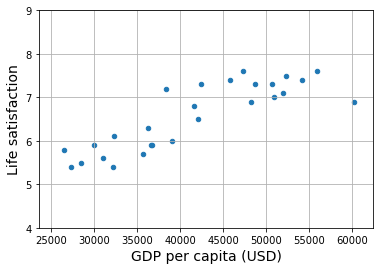

[[6.30165767]]


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Make this notebook’s output stable across runs
np.random.seed(42)

# Download and prepare the data
data_root = 'https://github.com/ageron/data/raw/main/'
lifesat = pd.read_csv(data_root + 'lifesat/lifesat.csv')
X = lifesat[['GDP per capita (USD)']].values
y = lifesat[['Life satisfaction']].values

# The next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Visualize the data
lifesat.plot(
    kind='scatter', grid=True, x='GDP per capita (USD)', y='Life satisfaction'
)
plt.axis([23_500, 62_500, 4, 9])
plt.show()

# Select a linear model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
# Cyprus' GDP per capita in 2020
X_new = [[37_655.2]]
# outputs [[6.30165767]]
print(model.predict(X_new))

Replacing the Linear Regression model with *k*-Nearest Neighbors (in this example, $k=3$) regression in the previous code is as simple as replacing these two lines:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

with these two:

```python
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)
```

In [2]:
# Select a 3-Nearest Neighbors regression model
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
# outputs [[6.33333333]]
print(model.predict(X_new))

[[6.33333333]]


## Main Challenges of Machine Learning
The two things that can go wrong are “bad model” and “bad data”.

### Insufficient Quantity of Training Data
It takes a lot of data for most ML algorithms to work properly. Even for simple 
problems we need thousands of examples, and for complex problems such as image 
or speech recognition we may need millions of examples.

<div style="border: 1px solid;">

#### The Unreasonable Effectiveness of Data
In a famous paper published in 2001 [“Scaling to Very Very Large Corpora for Natural Language Disambiguation”](https://homl.info/6), Microsoft researchers Michele Banko and Eric Brill showed that very different machine learning algorithms, including fairly simple ones, performed almost identically well on a complex problem of natural language disambiguation (e.g. knowing whether to write “to”, “two”, or “too”, depending on the context) once they were given enough data.

<center>
  <img 
    src="../images/01/the_unreasonable_effectiveness_of_data.png" 
    onerror="
      this.onerror = null;
      const repo = 'https://github.com/alirezatheh/handson-ml3-notes/blob/main';
      this.src = repo + this.src.split('..')[1];
    "
  >
</center>

The idea that data matters more than algorithms for complex problems was further popularized by Peter Norvig et al. in a paper titled [“The Unreasonable Effectiveness of Data”](https://homl.info/7), published in 2009.
</div>

### Nonrepresentative Training Data
In order to generalize well, it is crucial that our training data be representative of the new cases we want to generalize to. If the sample is too small, we will have *sampling noise* (i.e., nonrepresentative data as a result of chance), but even very large samples can be nonrepresentative if the sampling method is flawed. This is called *sampling bias*.

<center>
  <img 
    src="../images/01/representative_training_data.png"
    onerror="
      this.onerror = null;
      const repo = 'https://github.com/alirezatheh/handson-ml3-notes/blob/main';
      this.src = repo + this.src.split('..')[1];
    "
  >
</center>

### Poor-Quality Data
If our training data is full of errors, outliers, and noise (e.g., due to poor-quality measurements), it will make it harder for the system to detect the underlying patterns.

### Irrelevant Features
As the saying goes: garbage in, garbage out. A critical part of the success of a machine learning project is coming up with a good set of features to train on. This process, called *feature engineering*, involves the following steps:
- Feature selection (selecting the most useful features to train on among existing features)
- Feature extraction (combining existing features to produce a more useful one)
- Creating new features by gathering new data

### Overfitting the Training Data
Means that the model performs well on the training data, but it does not generalize well. Overfitting happens when the model is too complex relative to the amount and noisiness of the training data. Here are possible solutions:
- Simplify the model by selecting one with fewer parameters, by reducing the number of attributes in the training data, or by constraining the model.
- Gather more training data.
- Reduce the noise in the training data (e.g., fix data errors and remove outliers).

<center>
  <img 
    src="../images/01/overfitting_model.png"
    onerror="
      this.onerror = null;
      const repo = 'https://github.com/alirezatheh/handson-ml3-notes/blob/main';
      this.src = repo + this.src.split('..')[1];
    "
  >
</center>

Constraining a model to make it simpler and reduce the risk of overfitting is called *regularization*. The amount of regularization to apply during learning can be controlled by a *hyperparameter*. A hyperparameter is a parameter of a learning algorithm (not of the model).

### Underfitting the Training Data
It occurs when our model is too simple to learn the underlying structure of the data.

Solutions:
- Select a more powerful model, with more parameters.
- Feed better features to the learning algorithm (feature engineering).
- Reduce the constraints on the model.

## Testing and Validating
Split our data into two sets: the *training set* and the *test set*. Train the model using the training set, and test it using the test set. The error rate on new cases is called the *generalization error* (or *out-of-sample error*), and by evaluating our model on the test set, we get an estimate of this error. If the training error is low but the generalization error is high, it means that our model is overfitting the training data.

**Tip**: It is common to use 80% of the data for training and *hold out* 20% for testing. But if size of the dataset is large (> 1 million) 1% for test is more than enough.

### Hyperparameter Tuning and Model Selection
If we measure generalization error multiple times on the test set, and adapt the model and hyperparameters to produce the best model for that *particular set*, the model is unlikely to perform as well on new data.

A common solution to this problem is called *holdout validation*: simply hold out part of the training set to evaluate several candidate models and select the best one. The new held-out set is called the *validation set* (or the *development set*, or *dev set*).
- Train multiple models with various hyperparameters on the reduced training set (i.e., the full training set minus the validation set).
- Select the model that performs best on the validation set.
- Retrain the best model on the full training set (including the validation set).
- Estimate the generalization error on test set.

If the validation set is too small, then the model evaluations will be imprecise. If the validation set is too large, then the remaining training set will be much smaller than the full training set. It is like selecting the fastest sprinter to participate in a marathon.

The solution is to perform repeated *cross-validation*, using many small validation sets. Each model is evaluated once per validation set after it is trained on the rest of the data. By averaging out all the evaluations of a model, we get a much more accurate measure of its performance.

There is a drawback: the training time is multiplied by the number of validation sets.

### Data Mismatch
Sometimes we have a large amount of data downloaded from the web and nonrepresentative of the data that will be used in production. In this case it is important to keep both validation and test sets as representative as possible.

But if we observe that the validation error is bad, we will not know whether this is because the model is overfiting, or it is just due to the mismatch between the validation and test sets.

The solution is to hold out some of the training data in yet another set that Andrew Ng dubbed the *train-dev set*.

<center>
  <img 
    src="../images/01/train_dev_set.png" 
    onerror="
      this.onerror = null;
      const repo = 'https://github.com/alirezatheh/handson-ml3-notes/blob/main';
      this.src = repo + this.src.split('..')[1];
    "
  >
</center>

After the model is trained, we can evaluate it on the train-dev set. If it performs poorly, then it must have overfit the training set. But if it performs well on the train-dev set, then we evaluate the model on the dev set. If it performs poorly, then the problem must be coming from the data mismatch. We can try to tackle this problem by preprocessing the downloaded data to make them look more like the production data, and then retraining the model.

<div style="border: 1px solid;">

#### No Free Lunch Theorem
In a famous 1996 paper [“The Lack of A Priori Distinctions Between Learning Algorithms”](https://homl.info/8), David Wolpert demonstrated that if we make absolutely no assumption about the data, then there is no reason to prefer one model over any other. The only way to know for sure which model is best is to evaluate them all. Since this is not possible, in practice we make some reasonable assumptions about the data and evaluate only a few reasonable models.
</div>

## Exercises
1. How would we define machine learning?
> Machine learning is about building systems that can learn from data. Learning means getting better at some task, given some performance measure.
2. Can we name four types of applications where it shines?
> Machine learning is great for complex problems for which we have no  algorithmic solution, to replace long lists of hand-tuned rules, to build systems that adapt to fluctuating environments, and finally to help humans learn (e.g., data mining).
3. What is a labeled training set?
> A training set that contains the desired solution (a.k.a. a label) for each instance.
4. What are the two most common supervised tasks?
> The two most common supervised tasks are regression and classification.
5. Can we name four common unsupervised tasks?
> Clustering, visualization, dimensionality reduction, and association rule learning.
6. What type of algorithm would we use to allow a robot to walk in various unknown terrains?
> Reinforcement learning, since this is typically the type of problem that reinforcement learning tackles. It might be possible to express the problem as a supervised or semi-supervised learning problem, but it would be less natural.
7. What type of algorithm would we use to segment our customers into multiple groups?
> If we don't know how to define the groups, then we can use a clustering algorithm (unsupervised learning) to segment our customers into clusters of similar customers. However, if we know what groups we would like to have, then we can feed many examples of each group to a classification algorithm (supervised learning), and it will classify all our customers into these groups.
8. Would we frame the problem of spam detection as a supervised learning problem or an unsupervised learning problem?
> Supervised learning: the algorithm is fed many emails along with their labels (spam or not spam).
9. What is an online learning system?
> An online learning system can learn incrementally, as opposed to a batch learning system. This makes it capable of adapting rapidly to both changing data and autonomous systems, and of training on very large quantities of data.
10. What is out-of-core learning?
> Out-of-core algorithms can handle vast quantities of data that cannot fit in a computer's main memory. An out-of-core learning algorithm chops the data into mini-batches and uses online learning techniques to learn from these mini-batches.
11. What type of algorithm relies on a similarity measure to make predictions?
> An instance-based learning system learns the training data by heart; then, when given a new instance, it uses a similarity measure to find the most similar learned instances and uses them to make predictions.
12. What is the difference between a model parameter and a model hyperparameter?
> A model has one or more model parameters that determine what it will predict given a new instance (e.g., the slope of a linear model). A learning algorithm tries to find optimal values for these parameters such that the model generalizes well to new instances. A hyperparameter is a parameter of the learning algorithm itself, not of the model (e.g., the amount of regularization to apply).
13. What do model-based algorithms search for? What is the most common strategy they use to succeed? How do they make predictions?
> Model-based learning algorithms search for an optimal value for the model parameters such that the model will generalize well to new instances. We usually train such systems by minimizing a cost function that measures how bad the system is at making predictions on the training data, plus a penalty for model complexity if the model is regularized. To make predictions, we feed the new instance's features into the model's prediction function, using the parameter values found by the learning algorithm.
14. Can we name four of the main challenges in machine learning?
> The lack of data, poor data quality, nonrepresentative data, uninformative features, excessively simple models that underfit the training data, and excessively complex models that overfit the data.
15. If our model performs great on the training data but generalizes poorly to new instances, what is happening? Can we name three possible solutions?
> The model is likely overfitting the training data (or we got extremely lucky on the training data). Possible solutions to overfitting are getting more data, simplifying the model (selecting a simpler algorithm, reducing the number of parameters or features used, or regularizing the model), or reducing the noise in the training data.
16. What is a test set, and why would we want to use it?
> A test set is used to estimate the generalization error that a model will make on new instances, before the model is launched in production.
17. What is the purpose of a validation set?
> A validation set is used to compare models. It makes it possible to select the best model and tune the hyperparameters.
18. What is the train-dev set, when do we need it, and how do we use it?
> The train-dev set is used when there is a risk of mismatch between the training data and the data used in the validation and test datasets (which should always be as close as possible to the data used once the model is in production). The train-dev set is a part of the training set that's held out (the model is not trained on it). The model is trained on the rest of the training set, and evaluated on both the train-dev set and the validation set. If the model performs well on the training set but not on the train-dev set, then the model is likely overfitting the training set If it performs well on both the training set and the train-dev set, but not on the validation set, then there is probably a significant data mismatch between the training data and the validation + test data, and we should try to improve the training data to make it look more like the validation + test data.
19. What can go wrong if we tune hyperparameters using the test set?
> If we tune hyperparameters using the test set, we risk overfitting the test set, and the generalization error we measure will be optimistic (we may launch a model that performs worse than we expect).